<a href="https://colab.research.google.com/github/onurkasap/tensor/blob/main/cat_and_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow_datasets as tfds

(ds_train, ds_test), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,  # (image, label)
    with_info=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.QMC7FP_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


In [5]:
import tensorflow as tf

IMG_SIZE = 128

def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

ds_train = ds_train.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_test = ds_test.map(preprocess, num_parallel_calls=tf.data.AUTOTUNE)
ds_train = ds_train.batch(32).prefetch(tf.data.AUTOTUNE)
ds_test = ds_test.batch(32).prefetch(tf.data.AUTOTUNE)

In [6]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [8]:
history = model.fit(ds_train, epochs=5, validation_data=ds_test)

Epoch 1/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 32s 46ms/step - accuracy: 0.5886 - loss: 0.7273 - val_accuracy: 0.7227 - val_loss: 0.5578
Epoch 2/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 36s 43ms/step - accuracy: 0.7509 - loss: 0.5156 - val_accuracy: 0.7588 - val_loss: 0.5023
Epoch 3/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 41s 43ms/step - accuracy: 0.8241 - loss: 0.3872 - val_accuracy: 0.7597 - val_loss: 0.5345
Epoch 4/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 25s 43ms/step - accuracy: 0.8967 - loss: 0.2470 - val_accuracy: 0.7713 - val_loss: 0.6002
Epoch 5/5
582/582 ━━━━━━━━━━━━━━━━━━━━ 24s 42ms/step - accuracy: 0.9459 - loss: 0.1410 - val_accuracy: 0.7526 - val_loss: 0.7768


In [9]:
loss, accuracy = model.evaluate(ds_test)
print(f"Test doğruluk oranı: {accuracy:.2f}")

146/146 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.7506 - loss: 0.7745
Test doğruluk oranı: 0.75


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


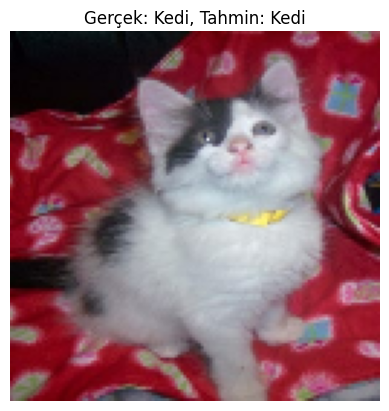

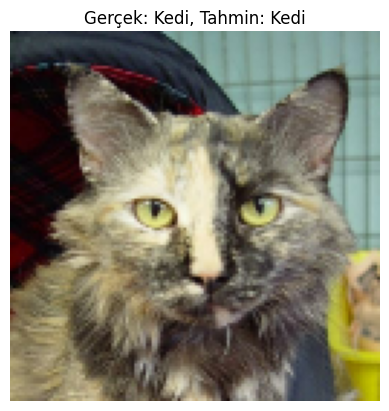

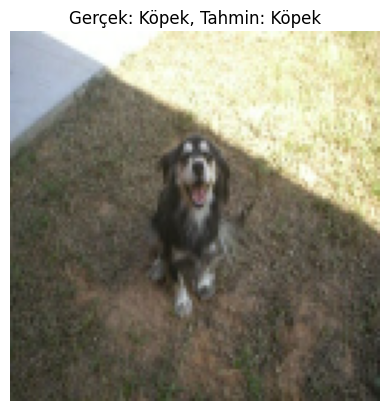

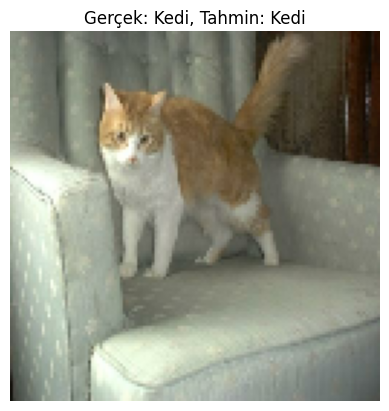

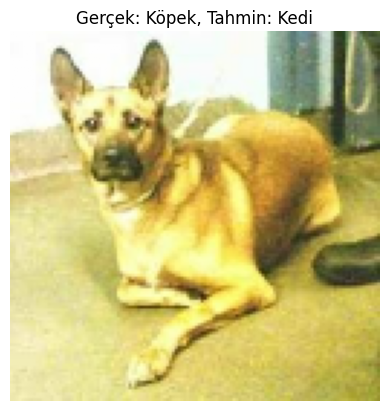

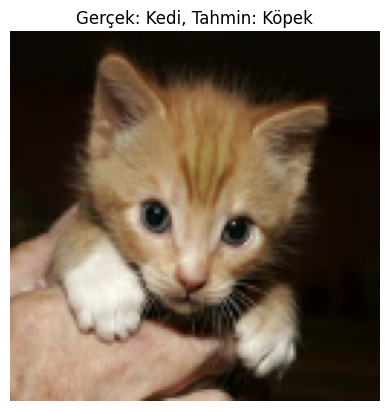

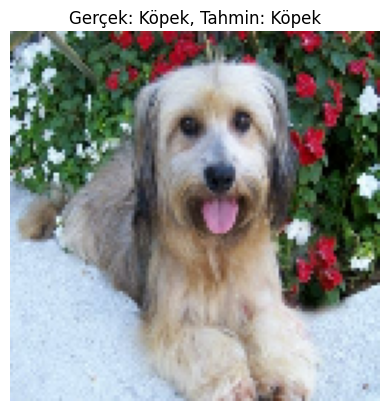

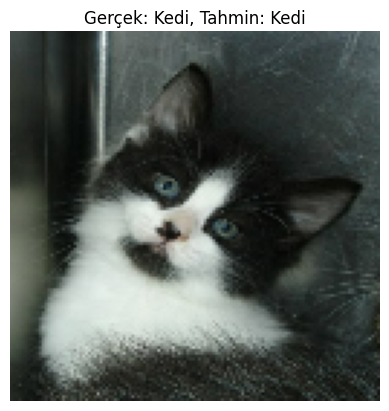

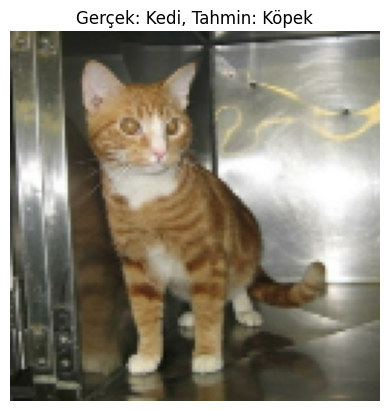

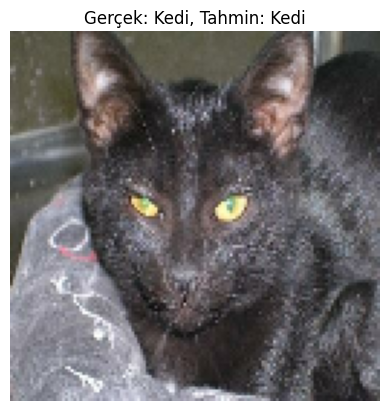

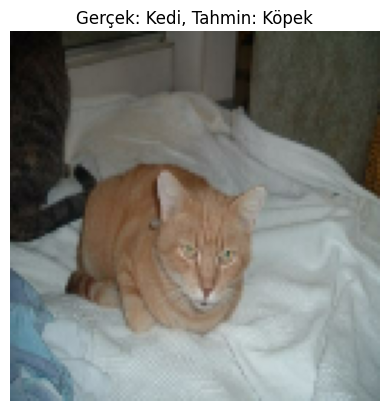

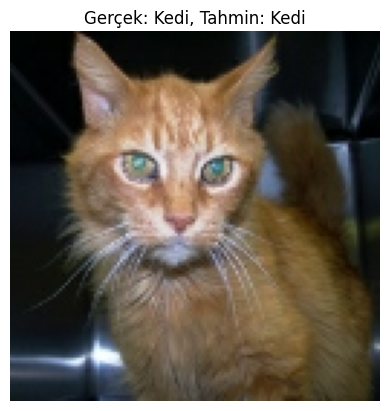

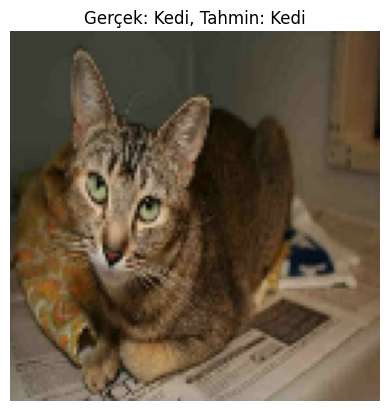

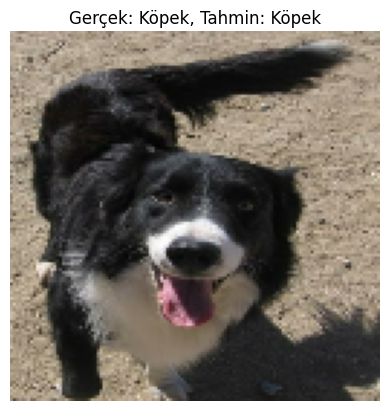

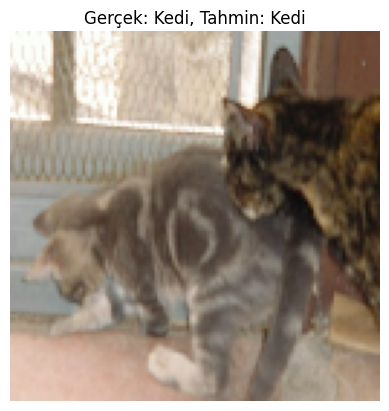

In [12]:
import matplotlib.pyplot as plt
for images, labels in ds_test.take(1):
    predictions = model.predict(images)
    for i in range(15):  # İlk 5 resmi görelim
        plt.imshow(images[i])
        pred_label = "Köpek" if predictions[i][0] > 0.5 else "Kedi"
        true_label = "Köpek" if labels[i].numpy() == 1 else "Kedi"
        plt.title(f"Gerçek: {true_label}, Tahmin: {pred_label}")
        plt.axis('off')
        plt.show()